In [22]:
from DataPreprocessing import load_data, preprocess_data
from FeatureExtraction import get_feature_importances
from CostFunction import cost_sensitive_metric
from ComputeMetrics import calculate_recall, calculate_accuracy, calculate_precision
from CustomerPredictionModel import CustomerPredictionModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
# Load and preprocess data
data = load_data('risk-train.txt')
processed_data = preprocess_data(data)

In [23]:
# Split the data into features and target
X = processed_data.drop(columns=['CLASS'])
y = processed_data['CLASS']

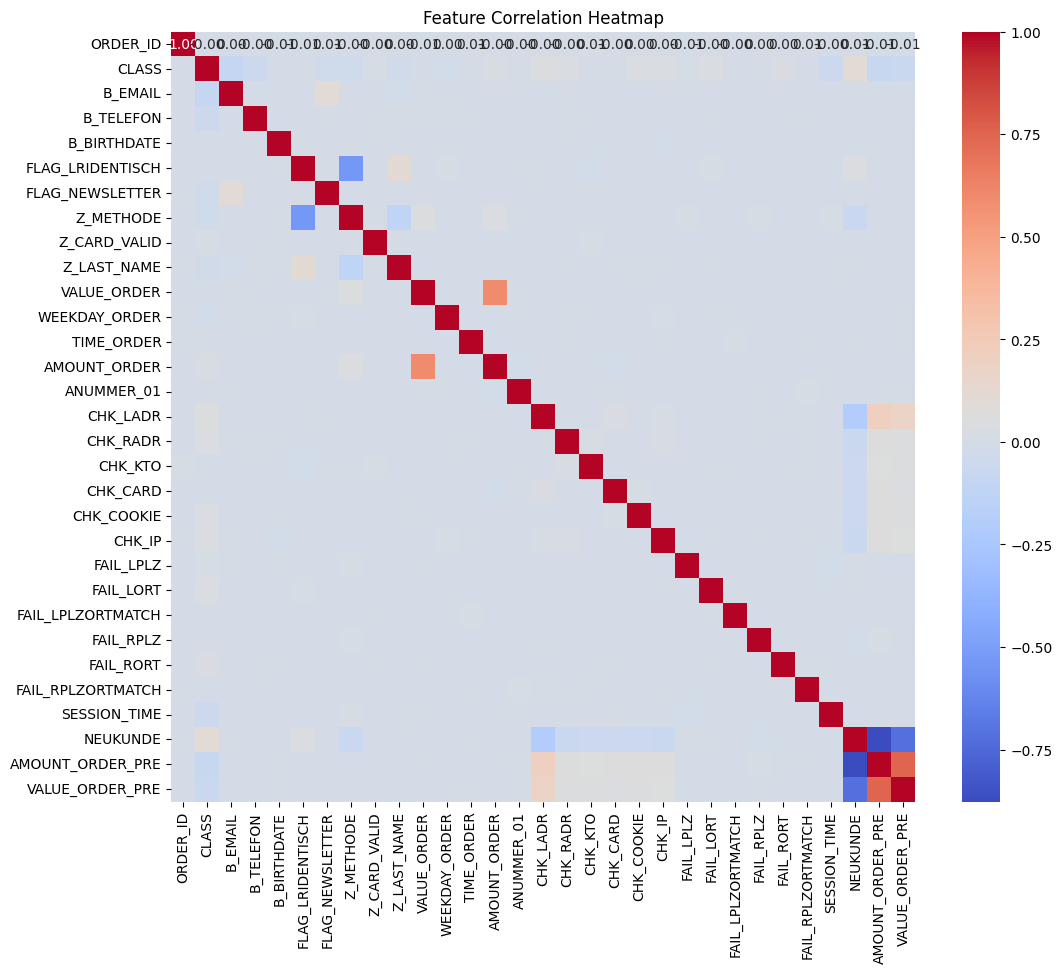

In [25]:
plt.figure(figsize=(12, 10))
correlation_matrix = processed_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


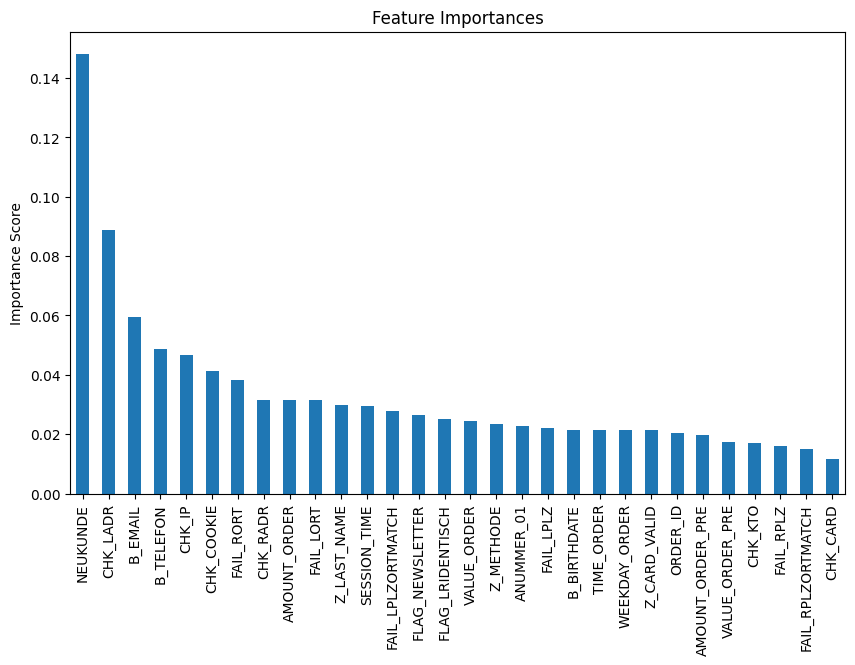

Index(['NEUKUNDE', 'CHK_LADR', 'B_EMAIL', 'B_TELEFON', 'CHK_IP', 'CHK_COOKIE',
       'FAIL_RORT', 'CHK_RADR', 'AMOUNT_ORDER', 'FAIL_LORT', 'Z_LAST_NAME',
       'SESSION_TIME', 'FAIL_LPLZORTMATCH', 'FLAG_NEWSLETTER',
       'FLAG_LRIDENTISCH', 'VALUE_ORDER', 'Z_METHODE', 'ANUMMER_01',
       'FAIL_LPLZ', 'B_BIRTHDATE', 'TIME_ORDER', 'WEEKDAY_ORDER',
       'Z_CARD_VALID', 'ORDER_ID', 'AMOUNT_ORDER_PRE', 'VALUE_ORDER_PRE',
       'CHK_KTO', 'FAIL_RPLZ', 'FAIL_RPLZORTMATCH', 'CHK_CARD'],
      dtype='object')

In [ ]:
# Feature importance extraction
selected_features = get_feature_importances(X, y)
selected_features

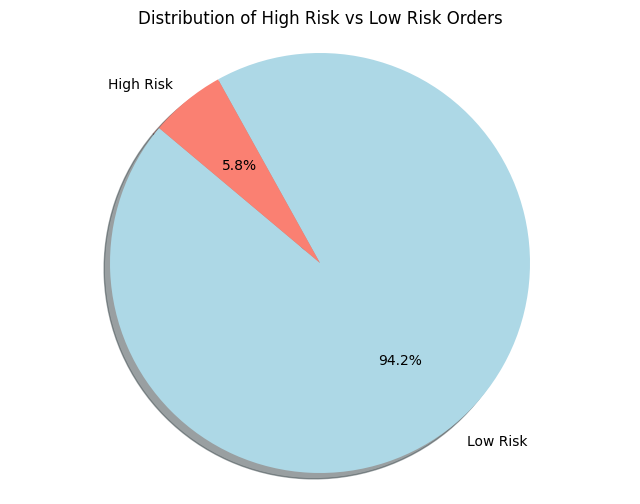

In [27]:
# Data for the pie chart
labels = ['Low Risk', 'High Risk']
sizes = [data['CLASS'].value_counts()[0], data['CLASS'].value_counts()[1]]  # Counting 'no' and 'yes'
colors = ['lightblue', 'salmon']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of High Risk vs Low Risk Orders')
plt.show()


In [20]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42, stratify=y)

prediction_model = CustomerPredictionModel(n_trees=100, max_depth=5, cost_sensitive=True)
prediction_model.fit(X_train.values, y_train.values)
y_pred = prediction_model.predict(X_test.values)

In [21]:
# Evaluation
accuracy = calculate_accuracy(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)
precision = calculate_precision(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
total_cost = cost_sensitive_metric(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy of the model: {accuracy*100:.2f}% \n")
print(f"Recall of the model: {recall*100:.2f}%\n")
print(f"Precision of the model: {precision*100:.2f}%\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nTotal Misclassification Cost: {total_cost}")

Accuracy of the model: 78.64% 

Recall of the model: 53.64%

Precision of the model: 14.73%

Confusion Matrix:
[[3806  938]
 [ 140  162]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.88      4744
           1       0.15      0.54      0.23       302

    accuracy                           0.79      5046
   macro avg       0.56      0.67      0.55      5046
weighted avg       0.92      0.79      0.84      5046


Total Misclassification Cost: 11690
